In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

- F1: intercolumnar distance
- F2: upper margin
- F3: lower margin
- F4: exploitation
- F5: row number
- F6: modular ratio
- F7: interlinear spacing
- F8: weight
- F9: peak number
- F10: modular ratio/ interlinear spacing

In [32]:
df = pd.read_csv('./avila-bible-datamad1019/training_dataset.csv')

In [14]:
display(df.head(2))
print(df.shape)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,scribe
0,0,-0.091897,0.297600,0.079145,0.196496,0.261718,1.269960,0.446679,-0.751707,0.001721,0.998901,Philippus
1,1,-0.091897,0.226939,0.267634,0.024091,0.261718,-0.806282,0.597681,-0.601277,0.126447,-0.909619,Paithonius


(12017, 12)


In [15]:
df.scribe.value_counts(normalize=True)*100

Marcus                42.431555
Philippus             19.688774
Franciscus            11.026046
Begonius               8.479654
Paithonius             5.259216
Noaelius               5.009570
Ubuntius               4.526920
FerrumEffractarius     3.578264
Name: scribe, dtype: float64

In [16]:
#tipo de datos
df.dtypes

id          int64
F1        float64
F2        float64
F3        float64
F4        float64
F5        float64
F6        float64
F7        float64
F8        float64
F9        float64
F10       float64
scribe     object
dtype: object

In [17]:
print('Total Null Values = ',df.isnull().sum().sum())

Total Null Values =  0


### Collinearity
Multicollinearity increases the standard errors of the coefficients. Increased standard errors in turn means that coefficients for some independent variables may be found not to be significantly different from 0. In other words, by overinflating the standard errors, multicollinearity makes some variables statistically insignificant when they should be significant. Without multicollinearity (and thus, with lower standard errors), those coefficients might be significant.

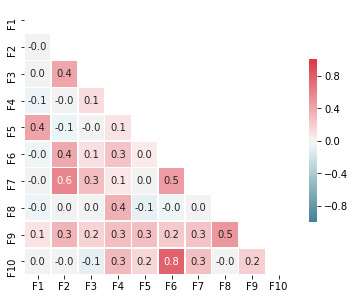

In [18]:
fig, ax = plt.subplots(figsize=(6,6))
mask = np.zeros_like(df.iloc[:,1:-1].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# ax.set_ylim(20, 40)
sns.heatmap(df.iloc[:,1:-1].corr(), cmap=cmap,mask=mask, annot=True,vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},vmin=-1,fmt='.1f')

# print(ax.get_ylim())
plt.show()

    One way to measure multicollinearity is the variance inflation factor (VIF), which assesses how much the variance of an estimated regression coefficient increases if your predictors are correlated.  If no factors are correlated, the VIFs will all be 1

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(df.iloc[:,1:-1].values, i) for i in range(df.iloc[:,1:-1].shape[1])]
di = dict(zip(df.iloc[:,1:-1].columns, vif))
di

{'F1': 1.2364287742734548,
 'F2': 3.05403530636881,
 'F3': 1.26524764540213,
 'F4': 1.3569456759996104,
 'F5': 1.468441129675398,
 'F6': 4.932996086769305,
 'F7': 1.7911812128103806,
 'F8': 1.6768360638663946,
 'F9': 1.9735786021482196,
 'F10': 4.517294565115995}

## Final dataframe

In [35]:
data = df.drop(['id','F6'], axis=1)
y = df['scribe']
X = data.iloc[:,:-1]

In [23]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

In [24]:
# steps = [
# #     StandardScaler(),
# #     Normalizer(),
#      PCA(n_components=5)
# ]
# pipe = make_pipeline(*steps)
# X = pipe.fit_transform(X)
# data = pd.DataFrame(X)

In [36]:
X.shape

(12017, 9)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
print(X.shape,y.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12017, 9) (12017,)
(9613, 9) (2404, 9) (9613,) (2404,)


In [149]:
rrf_params = {'n_estimators': 944,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'entropy',
 'bootstrap': False}

In [39]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
models = {
    "svm": LinearSVC(),
    "logistic": LogisticRegression(solver='lbfgs', max_iter=2000,multi_class='multinomial'),
    "logisticCV": LogisticRegressionCV (multi_class='multinomial'),
    "forest": RandomForestClassifier(),
    "forest_improve": RandomForestClassifier(max_depth=25,min_samples_leaf=1,min_samples_split=2, n_estimators=300),
    'knn': KNeighborsClassifier(),
    'ridge':RidgeClassifier(),
    'nearest_centroid':NearestCentroid(),
    'decision_tree':DecisionTreeClassifier(),
    'bbt':BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier())
    
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)


Training model: svm


/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Training model: logistic
Training model: logisticCV


/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-lea

Training model: forest
Training model: forest_improve
Training model: knn
Training model: ridge
Training model: nearest_centroid
Training model: decision_tree
Training model: bbt


In [40]:
d = {modelName:model.predict(X_test) for modelName, model in models.items()}
df = pd.DataFrame(d)
df['gt'] = y_test.reset_index(drop=True)
df.head(3)

,svm,logistic,logisticCV,forest,forest_improve,knn,ridge,nearest_centroid,decision_tree,bbt,gt
0,Marcus,Marcus,Marcus,Philippus,Philippus,Marcus,Marcus,Marcus,Philippus,Philippus,Philippus
1,Marcus,Marcus,Marcus,Paithonius,Paithonius,Marcus,Marcus,Paithonius,Paithonius,Paithonius,Paithonius
2,Franciscus,Paithonius,Paithonius,Franciscus,Franciscus,Paithonius,Philippus,Paithonius,Franciscus,Franciscus,Franciscus


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
scores = {}
for modelName, model in models.items():  
    scores[modelName] ={}
for modelName, model in models.items():  
    scores[modelName]['Accuracy'] =round(accuracy_score(df["gt"],df[modelName]),4)
    scores[modelName]['Precision'] =round(precision_score(df["gt"],df[modelName],average='weighted'),4)
    scores[modelName]['Recall'] =round(recall_score(df["gt"],df[modelName],average='weighted'),4)
    scores[modelName]['F1 Score'] =round(f1_score(df["gt"],df[modelName],average='weighted'),4)
#     scores[modelName]['roc_auc_score'] =round(roc_auc_score(df["gt"],df[modelName]),2)
pd.DataFrame(scores)

/Users/mariaadradosreig/Library/Python/3.7/lib/python/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,svm,logistic,logisticCV,forest,forest_improve,knn,ridge,nearest_centroid,decision_tree,bbt
Accuracy,0.5275,0.5520,0.5507,0.9963,0.9958,0.7775,0.4859,0.3315,0.9829,0.9418
Precision,0.3925,0.4534,0.4512,0.9963,0.9959,0.7776,0.3390,0.4737,0.9830,0.9443
Recall,0.5275,0.5520,0.5507,0.9963,0.9958,0.7775,0.4859,0.3315,0.9829,0.9418
F1 Score,0.4017,0.4541,0.4525,0.9963,0.9958,0.7745,0.3526,0.3418,0.9830,0.9417


In [42]:
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
confusion_matrix(df['gt'], df['forest_improve'])

array([[232,   0,   0,   0,   0,   0,   0,   0],
       [  0,  83,   1,   0,   0,   0,   0,   0],
       [  0,   0, 268,   1,   1,   0,   0,   0],
       [  0,   0,   0, 988,   0,   0,   0,   1],
       [  0,   0,   1,   1, 123,   0,   0,   0],
       [  0,   0,   1,   1,   0, 129,   0,   0],
       [  0,   0,   0,   0,   0,   0, 461,   1],
       [  0,   0,   0,   1,   0,   0,   0, 110]])

### Submission

In [39]:
test = pd.read_csv('./avila-bible-datamad1019/test_dataset.csv')
X_test_sub = test[['F1', 'F2', 'F3', 'F4', 'F5', 'F7', 'F8', 'F9', 'F10']]
# X_test_sub = test.iloc[:,1:]
clf = RandomForestClassifier()
OneVsRestClassifier(clf.fit(X, y))
# OneVsOneClassifier(clf.fit(X, y))
pred_sub = clf.predict(X_test_sub)

In [40]:
df_sub = pd.DataFrame(pred_sub, columns=['scribe'])
df_sub['id'] = test['id']
df_sub = df_sub[['id','scribe']]

In [41]:
df_sub.to_csv('submission_MA_4.csv',index=False)

In [134]:
df_sub.head(3)

,id,scribe
0,0,Franciscus
1,1,Ubuntius
2,2,Noaelius


## Hyperparameter Tuning 
In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node.
However, evaluating each model only on the training set can lead to one of the most fundamental problems in machine learning: overfitting.


In [80]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [74]:
# Number of trees in random forest
n_estimators = [100, 300, 500, 800, 1200]
# criterion = ['gini', 'entropy']
# Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [5, 8, 15, 25, 30]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10] 
# Method of selecting samples for training each tree
# bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
#                'criterion': criterion,
#                'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
#                'bootstrap': bootstrap}

In [75]:
from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune

forest = RandomForestClassifier()

# forest_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid,
#                                    n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
forest_grid = GridSearchCV(estimator = forest,param_grid=random_grid, cv = 3, verbose = 1, n_jobs = -1)

# Fit the random search model

forest_grid.fit(X, y)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 17.5min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 27.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 39.2min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 39.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [77]:
# forest_random.best_params_
# forest_grid.decision_function
best_params = forest_grid.best_params_
best_params

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [81]:
best_estimator = forest_grid.best_estimator_

In [136]:
# OneVsRestClassifier(best_estimator.fit(X,y))
OneVsOneClassifier(best_estimator.fit(X,y))

OneVsOneClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=25,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estim

In [137]:
pred_sub = best_estimator.predict(X_test_sub)

In [138]:
df_sub = pd.DataFrame(pred_sub, columns=['scribe'])
df_sub['id'] = test['id']
df_sub = df_sub[['id','scribe']]

In [139]:
df_sub.to_csv('submission_MA_7.csv',index=False)